In [1]:
import sys
sys.path.append('../..')
from utilities.get_data import get_historical_from_db
import pandas as pd
import ccxt
import matplotlib.pyplot as plt
import ta
import pandas_ta as pda
import matplotlib.pyplot as plt

In [2]:
# --- Load Data ---
pair = "ETH/USDT"
tf = "1h"

df = get_historical_from_db(ccxt.binance(),pair,tf,path="../../database/")
df

,open,high,low,close,volume
date,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029
...,...,...,...,...,...
2022-05-01 08:00:00,2766.40,2782.00,2765.18,2778.31,12854.70750
2022-05-01 09:00:00,2778.31,2780.64,2756.80,2768.31,8475.55070
2022-05-01 10:00:00,2768.32,2775.87,2761.00,2766.42,8231.25800


In [7]:
df['EMA50']=ta.trend.ema_indicator(df['close'], 50)
df['STOCH_RSI']=ta.momentum.stochrsi(df['close'])
df['KIJUN'] = ta.trend.ichimoku_base_line(df['high'],df['low'])
df['TENKAN'] = ta.trend.ichimoku_conversion_line(df['high'],df['low'])
df['SSA'] = ta.trend.ichimoku_a(df['high'],df['low'],3,38).shift(periods=48)
df['SSB'] = ta.trend.ichimoku_b(df['high'],df['low'],38,90).shift(periods=48)
df

,open,high,low,close,volume,EMA50,STOCH_RSI,KIJUN,TENKAN,SSA,SSB
date,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01 08:00:00,2766.40,2782.00,2765.18,2778.31,12854.70750,2813.422732,0.994171,2774.63,2755.640,2913.4125,2903.27
2022-05-01 09:00:00,2778.31,2780.64,2756.80,2768.31,8475.55070,2811.653606,0.857287,2774.63,2760.275,2909.0450,2903.27
2022-05-01 10:00:00,2768.32,2775.87,2761.00,2766.42,8231.25800,2809.879739,0.831199,2774.63,2774.955,2903.1875,2903.27


       i        result
2   40.0  34274.042687
1   39.0  34555.121426
0   38.0  35086.852487
5   43.0  36669.644761
4   42.0  39585.419391
3   41.0  39698.705285
22  60.0  40384.532062
29  67.0  40738.289848
28  66.0  41364.046005
27  65.0  41790.697110
8   46.0  42031.163132
6   44.0  42259.058035
7   45.0  42862.183376
33  71.0  43095.398175
10  48.0  43261.027937
32  70.0  43264.743719
30  68.0  43854.141638
20  58.0  43984.662555
23  61.0  43986.534475
31  69.0  44275.294214
25  63.0  44674.532386
24  62.0  45036.777432
15  53.0  45068.006168
21  59.0  45212.736384
9   47.0  45283.025752
16  54.0  45335.231002
34  72.0  45437.135153
26  64.0  46295.124748
13  51.0  46357.405876
17  55.0  46710.212969
11  49.0  46725.353894
35  73.0  47554.014940
18  56.0  47858.511330
14  52.0  48156.350312
12  50.0  48391.962738
19  57.0  48526.438501
38  76.0  48898.580546
39  77.0  48924.237281
41  79.0  51087.037800
40  78.0  51249.822223
36  74.0  52446.180399
37  75.0  53478.879663
42  80.0  5

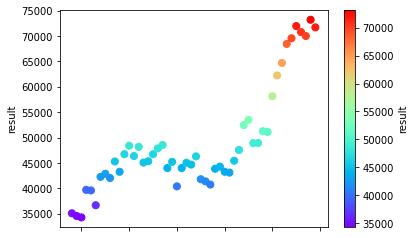

In [6]:
dt = None
dt = pd.DataFrame(columns = ['i', 'result'])
count=0

for i in range(38,90):
    df['SSA'] = ta.trend.ichimoku_a(df['high'],df['low'],3,38).shift(periods=48)
    df['SSB'] = ta.trend.ichimoku_b(df['high'],df['low'],38,i).shift(periods=48)
    dfTest = df.copy()
    usdt = 1000
    coin = 0
    fee = 0.0007
    wallet = 1000

    for index, row in dfTest.iterrows():
        #BUY
        if row['close']>row['SSA'] and row['close']>row['SSB'] and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
            buyPrice = row['close']
            coin = usdt/buyPrice
            coin = coin - fee*coin
            usdt = 0
            wallet = coin * row['close']
            #print("buy btc at ",df['close'][index]," || ",df['timestamp'][index], " || I have ",fiat,"$ and ",btc," btc")
        #SELL
        if (row['close'] < row['SSA'] or row['close'] < row['SSB']) and row['STOCH_RSI'] > 0.2 and coin > 0:
            sellPrice = row['close']
            usdt = coin*sellPrice
            usdt = usdt - fee*usdt
            coin = 0
            wallet = usdt
            #print("sell btc at ",df['close'][index]," || ",df['timestamp'][index], "|| I have ",fiat,"$ and ",btc," btc")
    myrow = {'i': i,'result': wallet}
    dt = dt.append(myrow,ignore_index=True) 
print(dt.sort_values(by=['result']))
dt.plot.scatter(x='i',y=1,c='result',s=50,colormap='rainbow') 
plt.show()

Period : [2017-08-17 04:00:00] -> [2022-05-01 12:00:00]
Starting balance : 1000 $
Final balance : 68580.07 $
Performance vs US Dollar : 6758.01 %
Buy and Hold Performence : 815.75 %
Performance vs Buy and Hold : 728.44 %
Number of negative trades :  251
Number of positive trades :  125
Average Positive Trades :  8.89 %
Average Negative Trades :  -2.13 %
Best trade +66.85 %, the  2017-12-21 16:00:00
Worst trade -16.06 %, the  2021-01-11 07:00:00
Worst drawBack -49.0 %
Total fee :  7572.43 $
PLOT


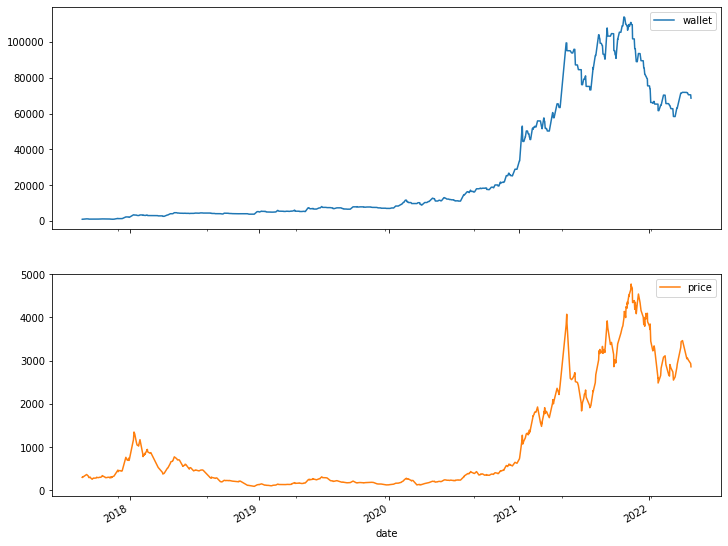

In [9]:
dfTest = df.copy()
# dfTest = df['2021-01-01':]
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastRow = dfTest.iloc[0]
fee = 0.0007
stopLoss = 0

for index, row in dfTest.iterrows():
  #Buy
  if row['close']>row['SSA'] and row['close']>row['SSB'] and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
    buyPrice = row['close']
    # stopLoss = buyPrice - 0.05 * buyPrice
    coin = usdt / buyPrice
    frais = fee * coin
    coin = coin - frais
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet
    # print("Buy COIN at",buyPrice,'$ the', index)
    myrow = {'date': index,'position': "Buy",'price': buyPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  #Stop Loss
  elif row['low'] < stopLoss and coin > 0:
     sellPrice = stopLoss
     usdt = coin * sellPrice
     frais = 0.0002 * usdt
     usdt = usdt - frais
     coin = 0
     wallet = usdt
     if wallet > lastAth:
       lastAth = wallet
     # print("Sell COIN at",sellPrice,'$ the', index)
     myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
     dt = dt.append(myrow,ignore_index=True)    

  # Sell
  elif (row['close'] < row['SSA'] or row['close'] < row['SSB']) and row['STOCH_RSI'] > 0.2 and coin > 0:
    sellPrice = row['close']
    usdt = coin * sellPrice
    frais = fee * usdt
    usdt = usdt - frais
    coin = 0
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at",sellPrice,'$ the', index)
    myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  lastRow = row

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')
# dt